In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
sys.path.insert(0, project_root)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps

from scripts.utils import plot_3d_realizations_enhanced

/home/pedro2/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Choose training image

/home/pedro2/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


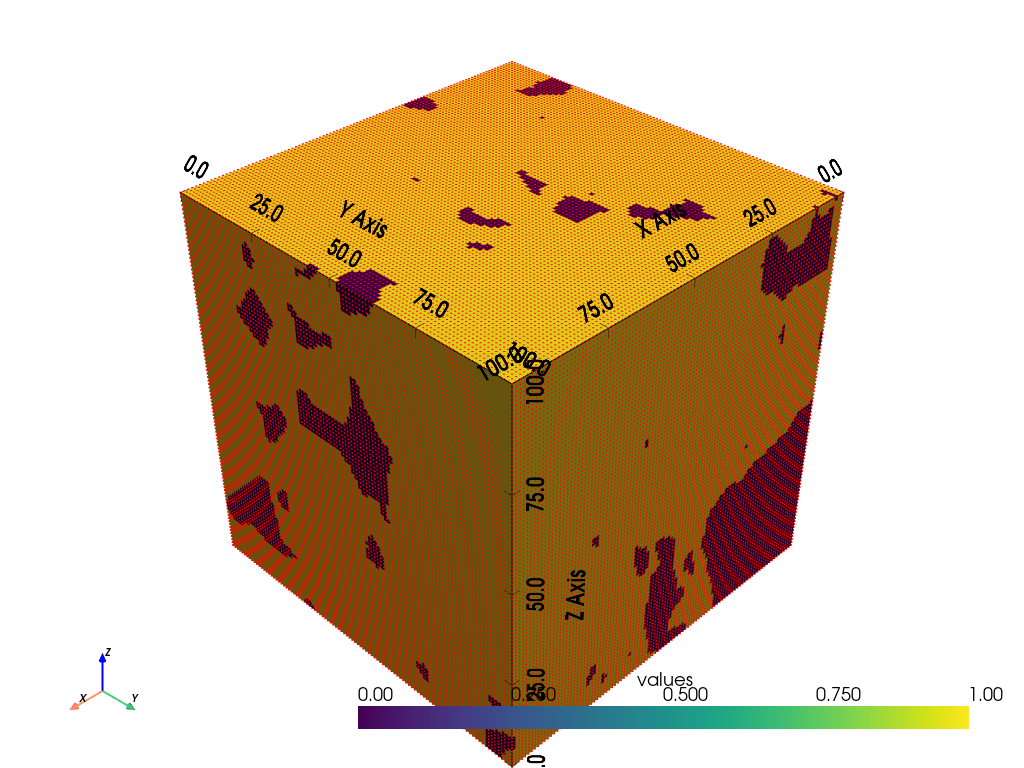

In [3]:
idx = 4
downsample_factor = 1

path = f"../../../data/3d/downsample_factor_{downsample_factor}/Parker_binary_{idx}"
path_eas = path + ".dat"
data_eas = mps.eas.read(filename=path_eas)
data_array = np.load(path + ".npy")
# data_transformed_array = np.load(path + "_transformed.npy")
mps.plot.plot(np.squeeze(data_array), slice=0)

## Setup MPSLib
First one need to initialize an instance of the mpslib object. 


In [4]:
simulation_grid_size = [100, 100, 100]
template_size = [3, 3, 3]

In [5]:
# Initialize MPSlib using default algortihm, and seetings
O = mps.mpslib();

# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=simulation_grid_size)

# specific parameters can be parsed directly when calling mps.mpslib (as abobve), or set by updating the O and O.par structure as 
#O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=25
O.par['n_real']=16
O.par['n_threads']=10
O.par['do_entropy']=1
O.par['simulation_grid_size']=np.array(simulation_grid_size)
O.par["template_size"]=np.array(template_size)
O.par["ti_fnam"] = path_eas

Using mps_genesim installed in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/bin (scikit-mps in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/mpslib.py)
Using mps_snesim_tree installed in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/bin (scikit-mps in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/mpslib.py)


In [6]:
# All adjustable parameters for the specifric chosen MPSlib algorithm are
O.par

{'n_real': 16,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': '../../../data/3d/downsample_factor_1/Parker_binary_4.dat',
 'simulation_grid_size': array([100, 100, 100]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': 10,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 1,
 'template_size': array([3, 3, 3]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 25}

## Run MPSlib

The chosen MPSlib algorithm is run using a single thread by executing 

    O.run()
    
and using multiple threads by executing

    O.run_parallel()


In [7]:
#O.run()
O.run_parallel()

parallel: Using 8 of max 10 threads


## Plot some realizations using matplotlib

/home/pedro2/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


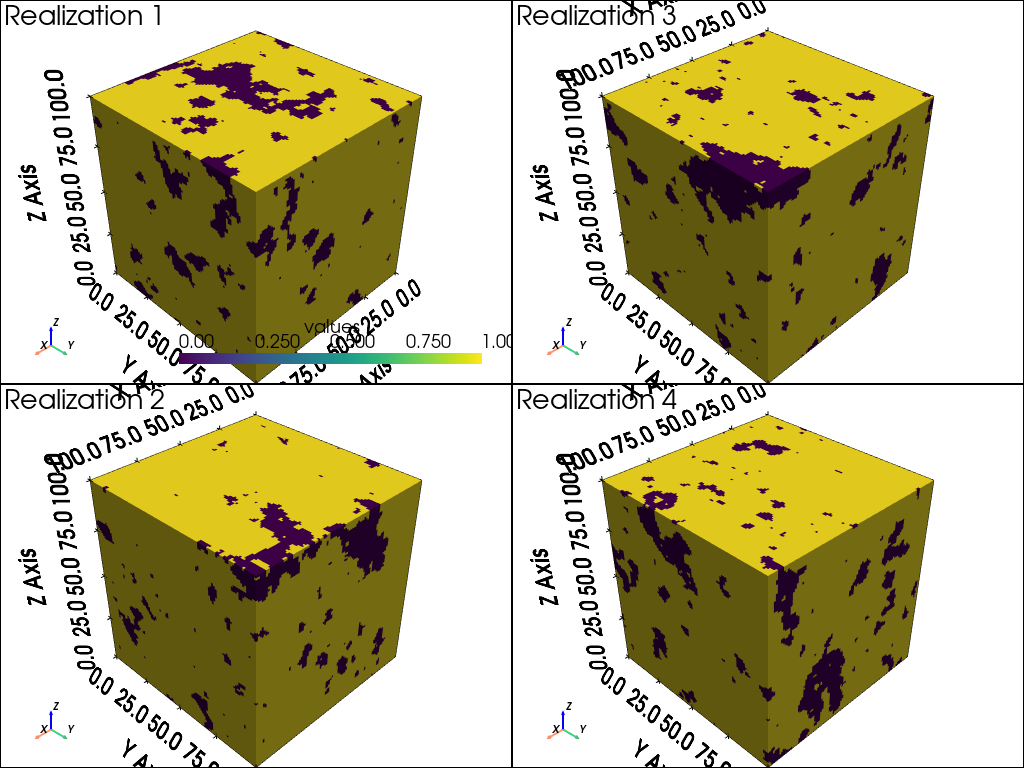

In [8]:
plot_3d_realizations_enhanced(O=O, n_realizations=4, slice_mode='full')